In [1]:
if(!require(tidyquant)) {
    install.packages("tidyquant")
    library(tidyquant)
}

if(!require(purrr)) {
    install.packages("purrr")
    library(purrr)
}

Loading required package: tidyquant

Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: quantmod

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

══ Need to Learn tidyquant? ════════════════════════════════════════════════════
Business Science offers a 1-hour course - Learning Lab #9: Performance Analysis & Portfolio Optimization with tidyquant!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>

Loading r

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.7
✔ tibble  3.1.5     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ dplyr::first()           masks xts::first()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ dplyr::last()            masks xts::last()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()



## 1. Download Stock Prices

### 1) Using Quantmod

In [3]:
options("getSymbols.warning4.0"=FALSE)
options("getSymbols.yahoo.warning"=FALSE)

# Downloading Apple price using quantmod
getSymbols("AAPL", from = '2017-01-01',
           to = "2018-03-01",warnings = FALSE,
           auto.assign = TRUE)

[1] "AAPL"

In [4]:
head(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2017-01-03   28.9500   29.0825  28.6900    29.0375   115127600      27.37236
2017-01-04   28.9625   29.1275  28.9375    29.0050    84472400      27.34172
2017-01-05   28.9800   29.2150  28.9525    29.1525    88774400      27.48077
2017-01-06   29.1950   29.5400  29.1175    29.4775   127007600      27.78713
2017-01-09   29.4875   29.8575  29.4850    29.7475   134247600      28.04164
2017-01-10   29.6925   29.8450  29.5750    29.7775    97848400      28.06993

In [5]:
class(AAPL)

[1] "xts" "zoo"

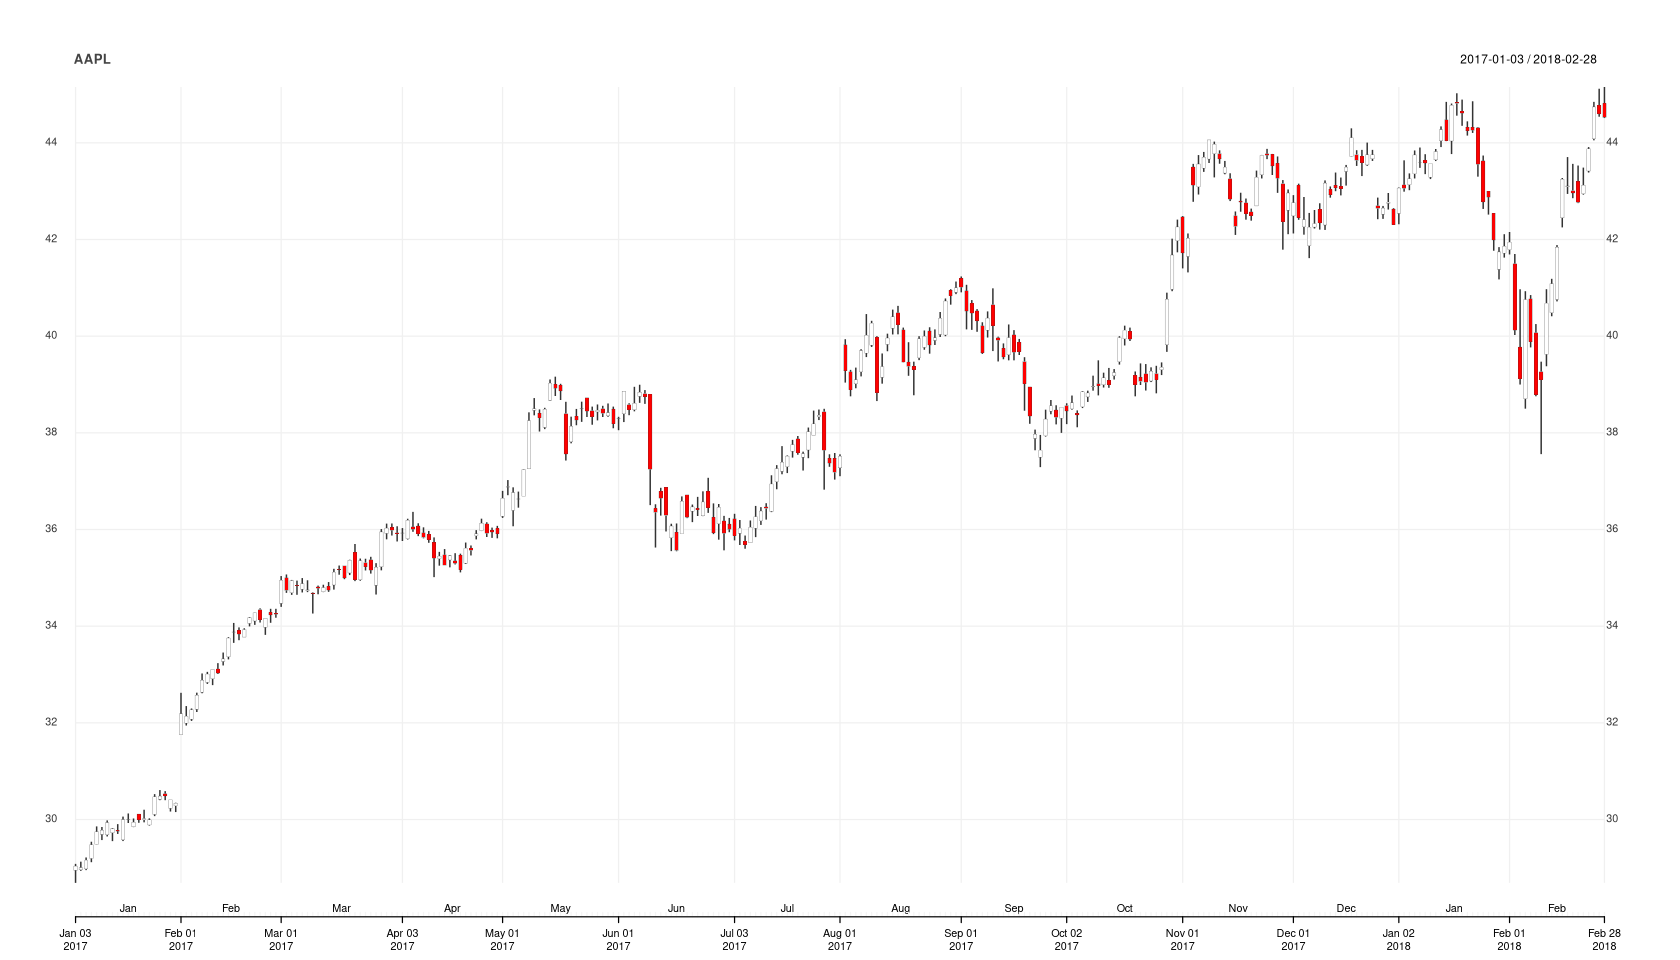

In [6]:
options(repr.plot.width = 14, repr.plot.height = 8, repl.plot.res=100)
chart_Series(AAPL)

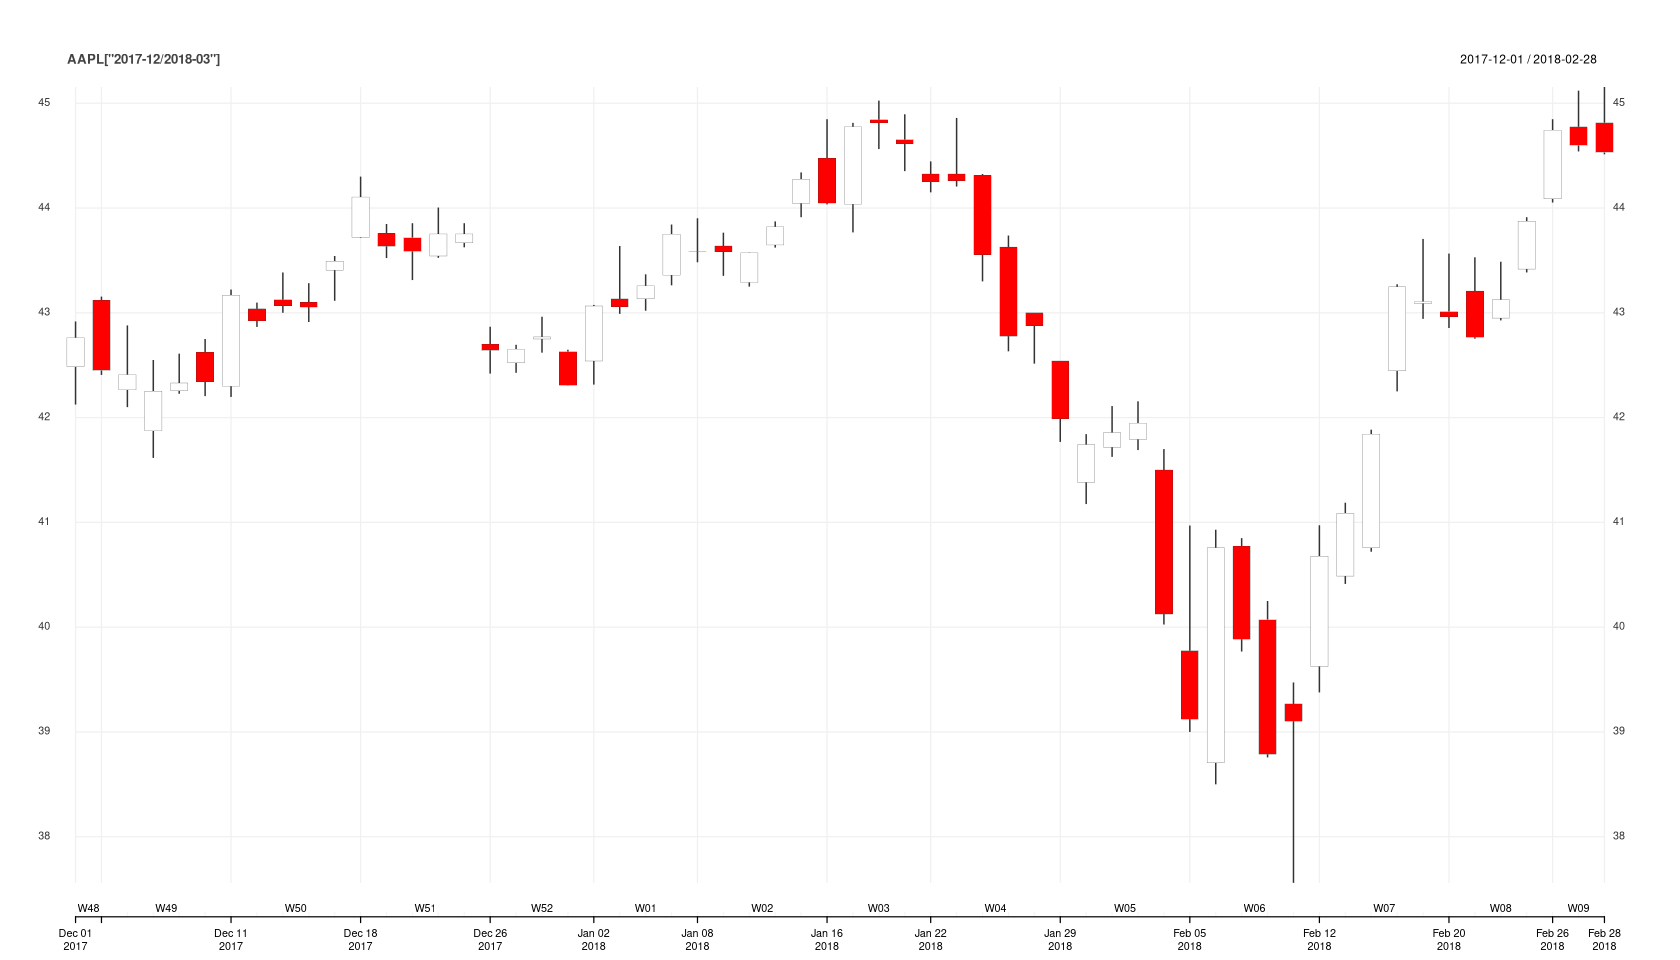

In [7]:
chart_Series(AAPL['2017-12/2018-03'])

In [8]:
tickers = c("AAPL", "NFLX", "AMZN", "K", "O")

getSymbols(tickers,
           from = "2017-01-01",
           to = "2017-01-15")

[1] "AAPL" "NFLX" "AMZN" "K"    "O"

In [9]:
prices <- map(tickers, function(x) Ad(get(x)))
prices <- reduce(prices, merge)
colnames(prices) <- tickers

In [10]:
prices

               AAPL   NFLX   AMZN        K        O
2017-01-03 27.37236 127.49 753.67 62.18544 46.73043
2017-01-04 27.34172 129.41 757.18 62.02441 47.42946
2017-01-05 27.48077 131.81 780.45 61.96507 48.70563
2017-01-06 27.78713 131.07 795.99 61.98203 48.64059
2017-01-09 28.04165 130.95 796.92 61.13446 48.28296
2017-01-10 28.06992 129.89 795.90 60.73614 47.70582
2017-01-11 28.22075 130.50 799.02 60.91411 47.57578
2017-01-12 28.10292 129.18 813.64 60.95649 48.42113
2017-01-13 28.05343 133.70 817.14 60.49881 48.01472

In [11]:
class(prices)

[1] "xts" "zoo"

### 2) Using tidyquant

In [12]:
aapl <- tq_get(
    'AAPL',
    from = "2017-01-01",
    to = "2020-12-31",
    get = "stock.prices"
)

In [13]:
head(aapl)

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2017-01-03,28.9500,29.0825,28.6900,29.0375,115127600,27.37236
AAPL,2017-01-04,28.9625,29.1275,28.9375,29.0050,84472400,27.34173
AAPL,2017-01-05,28.9800,29.2150,28.9525,29.1525,88774400,27.48077
AAPL,2017-01-06,29.1950,29.5400,29.1175,29.4775,127007600,27.78713
AAPL,2017-01-09,29.4875,29.8575,29.4850,29.7475,134247600,28.04165
AAPL,2017-01-10,29.6925,29.8450,29.5750,29.7775,97848400,28.06992


In [14]:
class(aapl)

[1] "tbl_df"     "tbl"        "data.frame"

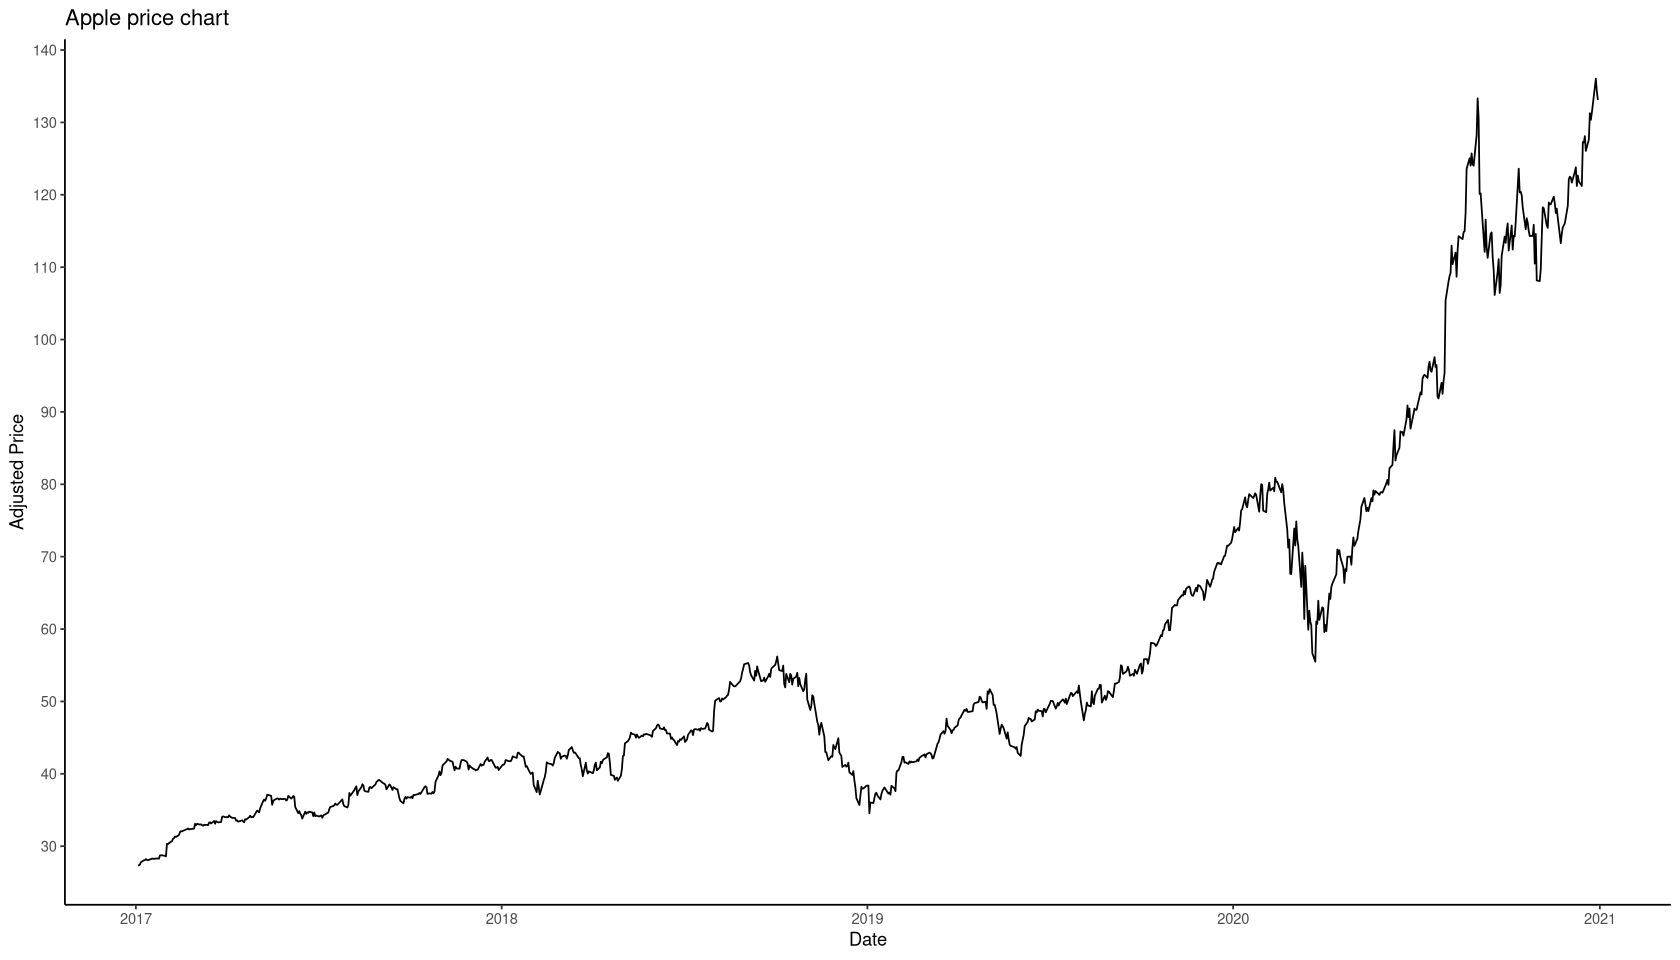

In [15]:
aapl %>%
    ggplot(aes(x = date, y = adjusted)) +
    geom_line() +
    theme_classic() +
    labs(
        x = "Date",
        y = "Adjusted Price",
        title = "Apple price chart"
    ) +
    scale_y_continuous(breaks = seq(0, 300, 10))

In [16]:
tickers <- c("AAPL", "NFLX", "AMZN", "GOOG", "FB", "MSFT")

In [17]:
prices <- tq_get(
    tickers,
    from = "2017-01-01",
    to = "2020-12-31",
    get = "stock.prices"
)

In [18]:
head(prices)

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2017-01-03,28.9500,29.0825,28.6900,29.0375,115127600,27.37236
AAPL,2017-01-04,28.9625,29.1275,28.9375,29.0050,84472400,27.34172
AAPL,2017-01-05,28.9800,29.2150,28.9525,29.1525,88774400,27.48077
AAPL,2017-01-06,29.1950,29.5400,29.1175,29.4775,127007600,27.78713
AAPL,2017-01-09,29.4875,29.8575,29.4850,29.7475,134247600,28.04165
AAPL,2017-01-10,29.6925,29.8450,29.5750,29.7775,97848400,28.06993


In [19]:
prices %>%
    group_by(symbol) %>%
    slice(1)

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2017-01-03,28.95,29.0825,28.69,29.0375,115127600,27.37236
AMZN,2017-01-03,757.92,758.7600,747.70,753.6700,3521100,753.66998
FB,2017-01-03,116.03,117.8400,115.51,116.8600,20663900,116.86000
GOOG,2017-01-03,778.81,789.6300,775.80,786.1400,1657300,786.14001
MSFT,2017-01-03,62.79,62.8400,62.13,62.5800,20694100,58.29197
NFLX,2017-01-03,124.96,128.1900,124.31,127.4900,9437900,127.49000


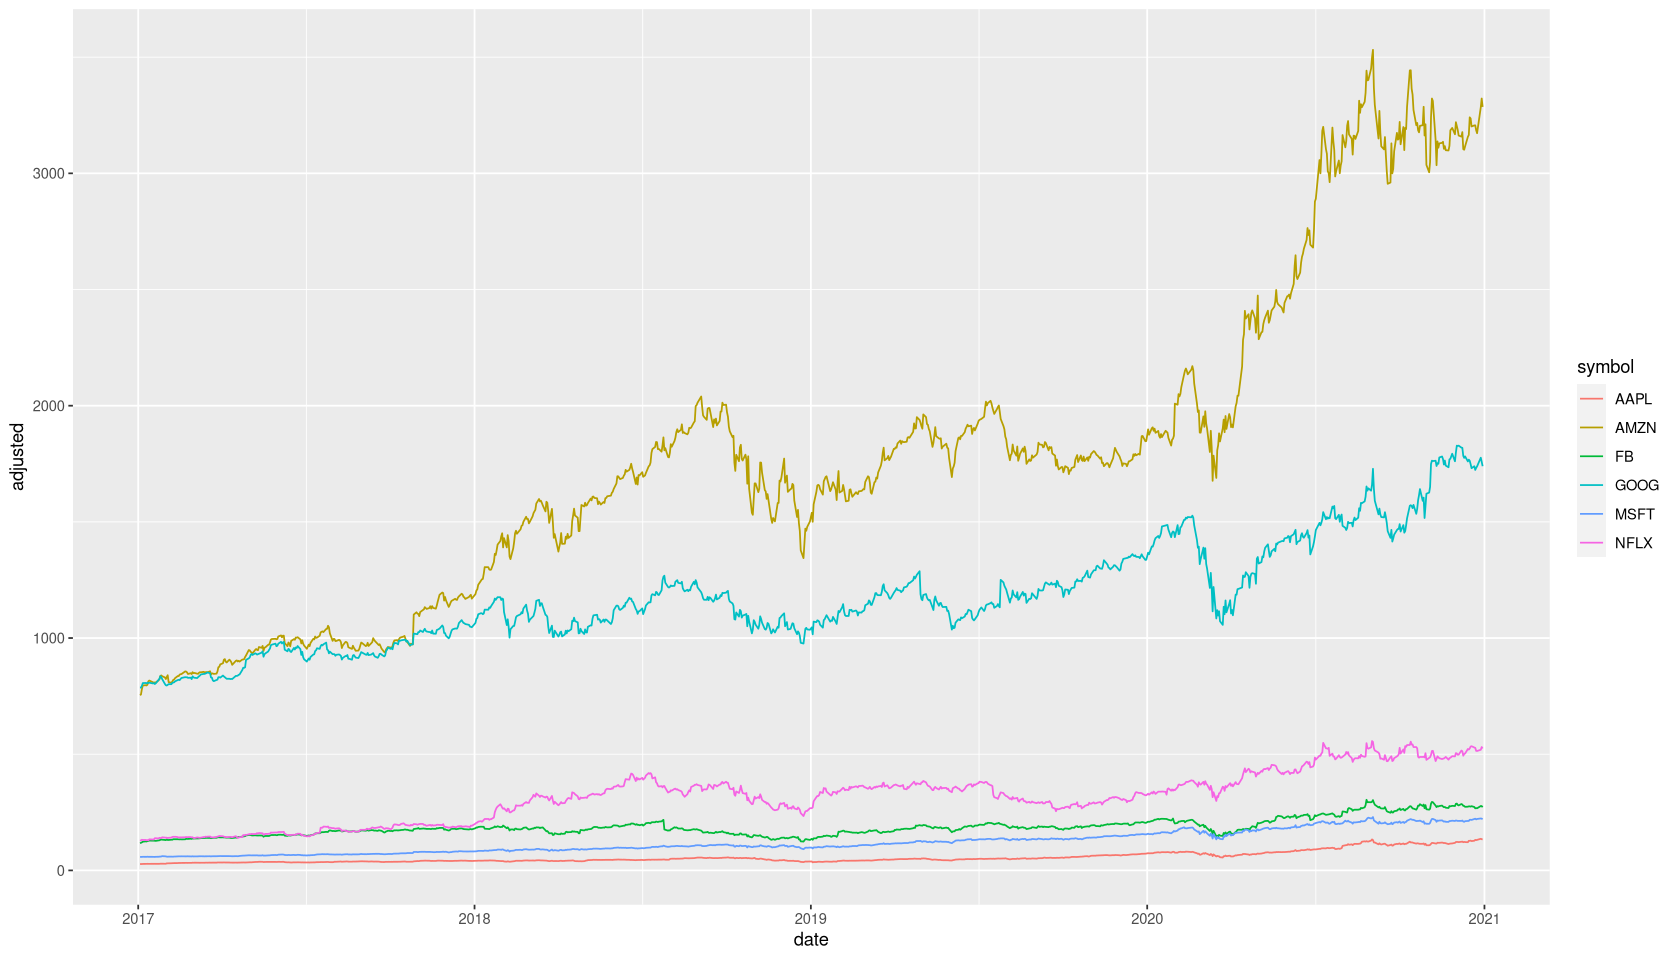

In [20]:
prices %>%
  ggplot(aes(x = date, y = adjusted, color = symbol)) +
  geom_line()

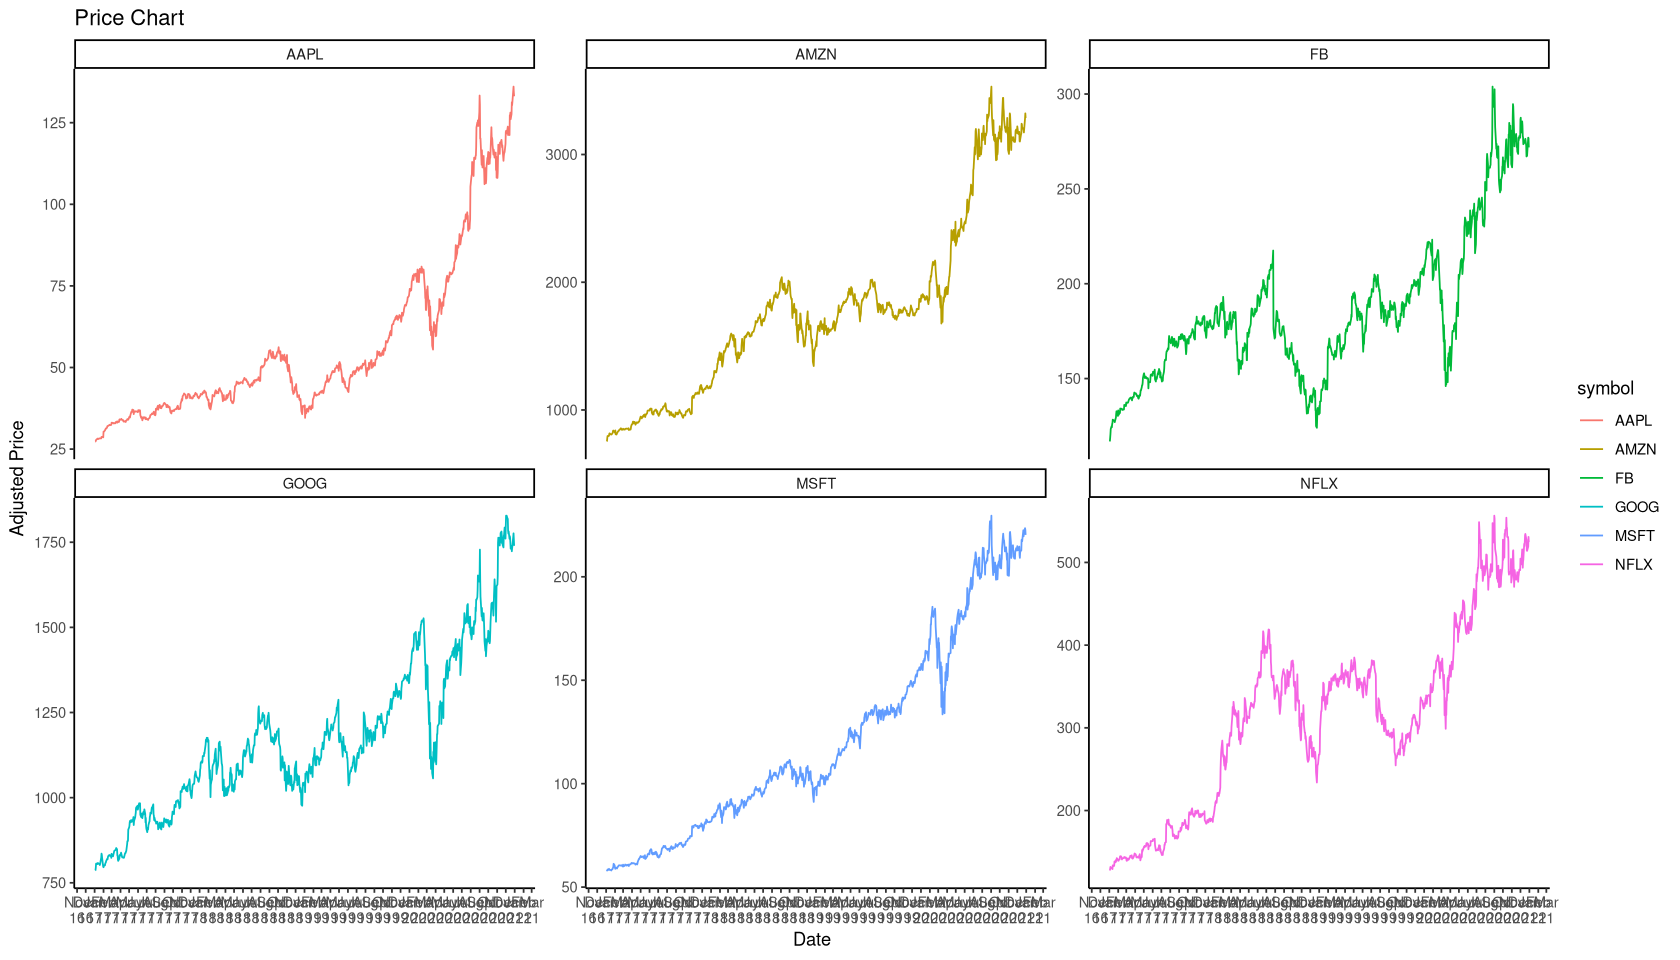

In [21]:
prices %>%
  ggplot(aes(x = date, y = adjusted, color = symbol)) +
  geom_line() +
  facet_wrap(~symbol,scales = 'free_y') +
  theme_classic() +
  labs(x = 'Date',
       y = "Adjusted Price",
       title = "Price Chart") +
  scale_x_date(date_breaks = "month",
               date_labels = "%b\n%y")